In [106]:
import dafpy as dfp
g = dfp.DataflowEnvironment(name='test', verbose=False)
g.set_call_args('u')
g.set_call_rets('y')
g.add_node('f', lambda x: x)
g.add_node('g', lambda x: x)
g.add_edge('f', 'g', apply=lambda x: -.9 * x)
g.add_edge_call_args('f')
g.add_edge_call_rets('g')
g.start()
g(10).y == -0.9 * 10


True

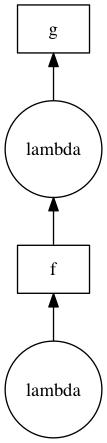

In [44]:
from dask import visualize
visualize(g.to_dask())

## Playing with generators 

In [103]:
g = dfp.DataflowEnvironment(name='test', verbose=False)
g.set_call_rets('y')
g.add_gentask('f', lambda gen : (x for x in [0,1,2]))
g.add_node('g', lambda x: x)
g.add_edge('f', 'g', apply=lambda x: -.9 * x)
g.add_edge_call_rets('g')
g.start()
list(g.gen())

[test(y=-0.0), test(y=-0.9), test(y=-1.8)]